# __EDA (Explanatory Data Analysis) of Yellow taxies data NYC__

<img src = 'https://cabstartup.com/wp-content/uploads/2018/05/Yellow-Taxi-Banner.png' height = 500 width =1500>

# __Introduction__ 

- ### The dataset for this project is taken from NYC TLC Trip Record Data. [link]('https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page').
- ### In this project, New york city yellow taxi data of 7 months (Jan - Jul) in year 2021 are taken into consideration for the analysis.
- ### Here Dask, folium, geopandas, pandas library are utilized.

## __Objective:__

- ### The main goal of this project is to identify maximum taxi usage day and distance between two points.
- ### Time difference between pick and drop location.
- ### Top pickup and dropping points in the city

## __Schema of the dataset__

- 'VendorID' = ID
- 'tpep_pickup_datetime' = pickup time and date
- 'tpep_dropoff_datetime' = drop time and date
- 'passenger_count' = passenger count
- 'trip_distance' = total distance
- 'RatecodeID' = Ratings 
- 'store_and_fwd_flag'
- 'PULocationID' = Pickup location id
- 'DOLocationID' = dropup location id
- 'payment_type' = mode of payment
- 'fare_amount' = trip amount 
- 'extra' = like waiting or extra time
- 'mta_tax' = tax 
- 'tip_amount' = final tip amount
- 'tolls_amount' = toll amount 
- 'improvement_surcharge' = surcharge amount
- 'total_amount' = final amount with all taxes, tip
- 'congestion_surcharge'

## __Analysis Part-I__

## __1. Importing libraries__

In [1]:
!pip install dask

In [2]:
# importing the libraries
import dask
import dask.dataframe as dd
import pandas as pd
import os
import glob

In [3]:
os.listdir("Trip_data")

['yellow_tripdata_2021-01.csv',
 'yellow_tripdata_2021-02.csv',
 'yellow_tripdata_2021-03.csv',
 'yellow_tripdata_2021-04.csv',
 'yellow_tripdata_2021-05.csv',
 'yellow_tripdata_2021-06.csv',
 'yellow_tripdata_2021-07.csv']

In [4]:
from glob import glob
files_ = sorted(glob(os.path.join("Trip_data", "*.csv")))

## __2. Creating the dask dataframe__

In [5]:
df = dd.read_csv(files_, dtype={'RatecodeID': 'float64',
       'VendorID': 'float64', 'tolls_amount': 'float64',
       'passenger_count': 'float64',
       'payment_type': 'float64'}, parse_dates = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
)

In [6]:
df.compute().info()

D:\Anaconda\envs\my_env\lib\site-packages\dask\dataframe\io\csv.py:125: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  df = pandas_read_text(


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000700 entries, 0 to 290639
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               float64       
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           float64       
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
dtypes: datetime64[ns](2), 

## __3. Taking a sample of data for the further analysis__

In [7]:
#creating the sample with fraction 
new_data = df.sample(frac= 0.04).persist()

D:\Anaconda\envs\my_env\lib\site-packages\dask\dataframe\io\csv.py:125: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  df = pandas_read_text(


In [8]:
new_data.compute().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600027 entries, 178566 to 252006
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               566533 non-null  float64       
 1   tpep_pickup_datetime   600027 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  600027 non-null  datetime64[ns]
 3   passenger_count        566533 non-null  float64       
 4   trip_distance          600027 non-null  float64       
 5   RatecodeID             566533 non-null  float64       
 6   store_and_fwd_flag     566533 non-null  object        
 7   PULocationID           600027 non-null  int64         
 8   DOLocationID           600027 non-null  int64         
 9   payment_type           566533 non-null  float64       
 10  fare_amount            600027 non-null  float64       
 11  extra                  600027 non-null  float64       
 12  mta_tax                600027 non-null 

In [9]:
new_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
178566,2.0,2021-01-06 12:48:46,2021-01-06 12:58:27,1.0,0.70,1.0,N,140,236,2.0,7.5,0.0,0.5,0.00,0.0,0.3,10.80,2.5
52770,1.0,2021-01-02 21:28:12,2021-01-02 21:38:08,1.0,3.20,1.0,N,79,141,1.0,11.5,3.0,0.5,3.05,0.0,0.3,18.35,2.5
86127,2.0,2021-01-04 09:51:42,2021-01-04 09:58:10,4.0,1.05,1.0,N,107,234,1.0,6.0,0.0,0.5,1.86,0.0,0.3,11.16,2.5
224455,2.0,2021-01-07 12:00:31,2021-01-07 12:11:20,1.0,1.82,1.0,N,141,236,1.0,9.0,0.0,0.5,1.50,0.0,0.3,13.80,2.5
249503,2.0,2021-01-07 19:31:20,2021-01-07 19:35:54,1.0,0.89,1.0,N,230,100,2.0,5.0,1.0,0.5,0.00,0.0,0.3,9.30,2.5


In [10]:
new_data.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
92,2.0,2021-07-30 11:37:27,2021-07-30 11:43:09,1.0,0.76,1.0,N,234,170,1.0,5.50,0.00,0.5,1.76,0.0,0.3,10.56,2.5
139167,2.0,2021-07-31 19:17:20,2021-07-31 19:31:53,1.0,3.76,1.0,N,232,164,1.0,15.00,0.00,0.5,1.00,0.0,0.3,19.30,2.5
263814,NaN,2021-07-25 00:07:00,2021-07-25 00:32:00,NaN,14.71,NaN,NaN,179,228,NaN,47.45,0.00,0.5,7.97,0.0,0.3,56.22,0.0
214020,NaN,2021-07-13 21:35:14,2021-07-13 21:42:37,NaN,1.30,NaN,NaN,162,48,NaN,7.00,0.50,0.5,1.62,0.0,0.3,12.42,2.5
252006,NaN,2021-07-26 08:15:00,2021-07-26 08:19:00,NaN,0.73,NaN,NaN,193,202,NaN,11.45,2.75,0.5,0.00,0.0,0.3,15.00,0.0


In [11]:
new_data.compute()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
178566,2.0,2021-01-06 12:48:46,2021-01-06 12:58:27,1.0,0.70,1.0,N,140,236,2.0,7.50,0.00,0.5,0.00,0.0,0.3,10.80,2.5
52770,1.0,2021-01-02 21:28:12,2021-01-02 21:38:08,1.0,3.20,1.0,N,79,141,1.0,11.50,3.00,0.5,3.05,0.0,0.3,18.35,2.5
86127,2.0,2021-01-04 09:51:42,2021-01-04 09:58:10,4.0,1.05,1.0,N,107,234,1.0,6.00,0.00,0.5,1.86,0.0,0.3,11.16,2.5
224455,2.0,2021-01-07 12:00:31,2021-01-07 12:11:20,1.0,1.82,1.0,N,141,236,1.0,9.00,0.00,0.5,1.50,0.0,0.3,13.80,2.5
249503,2.0,2021-01-07 19:31:20,2021-01-07 19:35:54,1.0,0.89,1.0,N,230,100,2.0,5.00,1.00,0.5,0.00,0.0,0.3,9.30,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,2.0,2021-07-30 11:37:27,2021-07-30 11:43:09,1.0,0.76,1.0,N,234,170,1.0,5.50,0.00,0.5,1.76,0.0,0.3,10.56,2.5
139167,2.0,2021-07-31 19:17:20,2021-07-31 19:31:53,1.0,3.76,1.0,N,232,164,1.0,15.00,0.00,0.5,1.00,0.0,0.3,19.30,2.5
263814,NaN,2021-07-25 00:07:00,2021-07-25 00:32:00,NaN,14.71,NaN,NaN,179,228,NaN,47.45,0.00,0.5,7.97,0.0,0.3,56.22,0.0
214020,NaN,2021-07-13 21:35:14,2021-07-13 21:42:37,NaN,1.30,NaN,NaN,162,48,NaN,7.00,0.50,0.5,1.62,0.0,0.3,12.42,2.5


In [12]:
new_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

## __4. Calculating the duration of the trip__

### __4.1 Creating a new dataframe backend as pandas__

In [13]:
new_dt = new_data.compute().reset_index()

In [14]:
new_dt['tpep_pickup_datetime'][1]

Timestamp('2021-01-02 21:28:12')

In [15]:
import numpy as np

### __4.2 Creating a function to calculate the time difference__

- t0 = start time
- t1 = end time
- [link gives info about timedelta]('https://numpy.org/doc/stable/reference/arrays.datetime.html')
- here 'm' is minute and Unix epoch (00:00:00 UTC on '1' January 1970)
$$ (t1 - t0)

In [16]:
#time difference function
def time_(x):
    y = round((new_dt['tpep_dropoff_datetime'][x] - new_dt['tpep_pickup_datetime'][x])/np.timedelta64(1, 'm'), 2)
    return y
time_(0)

9.68

In [18]:
#appending difference time to list
t1 = []
for i in range(len(new_dt)):
    t = time_(i)
    t1.append(t)

## __5. Adding time diff to dataframe__

In [19]:
# adding a new column with time diff
new_dt['Time_diff_min'] = t1

In [20]:
new_dt

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Time_diff_min
0,178566,2.0,2021-01-06 12:48:46,2021-01-06 12:58:27,1.0,0.70,1.0,N,140,236,2.0,7.50,0.00,0.5,0.00,0.0,0.3,10.80,2.5,9.68
1,52770,1.0,2021-01-02 21:28:12,2021-01-02 21:38:08,1.0,3.20,1.0,N,79,141,1.0,11.50,3.00,0.5,3.05,0.0,0.3,18.35,2.5,9.93
2,86127,2.0,2021-01-04 09:51:42,2021-01-04 09:58:10,4.0,1.05,1.0,N,107,234,1.0,6.00,0.00,0.5,1.86,0.0,0.3,11.16,2.5,6.47
3,224455,2.0,2021-01-07 12:00:31,2021-01-07 12:11:20,1.0,1.82,1.0,N,141,236,1.0,9.00,0.00,0.5,1.50,0.0,0.3,13.80,2.5,10.82
4,249503,2.0,2021-01-07 19:31:20,2021-01-07 19:35:54,1.0,0.89,1.0,N,230,100,2.0,5.00,1.00,0.5,0.00,0.0,0.3,9.30,2.5,4.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600022,92,2.0,2021-07-30 11:37:27,2021-07-30 11:43:09,1.0,0.76,1.0,N,234,170,1.0,5.50,0.00,0.5,1.76,0.0,0.3,10.56,2.5,5.70
600023,139167,2.0,2021-07-31 19:17:20,2021-07-31 19:31:53,1.0,3.76,1.0,N,232,164,1.0,15.00,0.00,0.5,1.00,0.0,0.3,19.30,2.5,14.55
600024,263814,NaN,2021-07-25 00:07:00,2021-07-25 00:32:00,NaN,14.71,NaN,NaN,179,228,NaN,47.45,0.00,0.5,7.97,0.0,0.3,56.22,0.0,25.00
600025,214020,NaN,2021-07-13 21:35:14,2021-07-13 21:42:37,NaN,1.30,NaN,NaN,162,48,NaN,7.00,0.50,0.5,1.62,0.0,0.3,12.42,2.5,7.38


## __Analysis Part-II__

## __6. Creating a new dataframe__

In [21]:
idata = new_dt.iloc[:,[0,1,2,3,4,5,8,9,17,19]]
idata.head()

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,total_amount,Time_diff_min
0,178566,2.0,2021-01-06 12:48:46,2021-01-06 12:58:27,1.0,0.70,140,236,10.80,9.68
1,52770,1.0,2021-01-02 21:28:12,2021-01-02 21:38:08,1.0,3.20,79,141,18.35,9.93
2,86127,2.0,2021-01-04 09:51:42,2021-01-04 09:58:10,4.0,1.05,107,234,11.16,6.47
3,224455,2.0,2021-01-07 12:00:31,2021-01-07 12:11:20,1.0,1.82,141,236,13.80,10.82
4,249503,2.0,2021-01-07 19:31:20,2021-01-07 19:35:54,1.0,0.89,230,100,9.30,4.57


In [22]:
idata.isnull().sum()

index                        0
VendorID                 33494
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          33494
trip_distance                0
PULocationID                 0
DOLocationID                 0
total_amount                 0
Time_diff_min                0
dtype: int64

In [23]:
idata.shape

(600027, 10)

## __7. Identifying the outliners in the dataset__

### __7.1 Outliners in the time difference columns__

In [24]:
idata['Time_diff_min'].min()

-0.95

In [25]:
# smallest time difference
small= list(idata['Time_diff_min'].nsmallest(5))
small

[-0.95, -0.95, -0.93, -0.93, -0.93]

In [26]:
for i in small:
    z = idata[idata['Time_diff_min'] == i]
    print(z)


         index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
51537   265522       NaN  2021-01-26 08:01:59   2021-01-26 08:01:02   
100639  195971       NaN  2021-02-02 08:02:59   2021-02-02 08:02:02   

        passenger_count  trip_distance  PULocationID  DOLocationID  \
51537               NaN           4.43           265            33   
100639              NaN           3.34           265           215   

        total_amount  Time_diff_min  
51537           28.1          -0.95  
100639          29.0          -0.95  
         index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
51537   265522       NaN  2021-01-26 08:01:59   2021-01-26 08:01:02   
100639  195971       NaN  2021-02-02 08:02:59   2021-02-02 08:02:02   

        passenger_count  trip_distance  PULocationID  DOLocationID  \
51537               NaN           4.43           265            33   
100639              NaN           3.34           265           215   

        total_amount  Time_diff_min 

In [27]:
# larger time differences

large = list(idata['Time_diff_min'].nlargest(5))

In [28]:
for i in large:
    z1 = idata[idata['Time_diff_min'] == i]
    print(z1)

        index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
110572  14888       2.0  2021-03-01 11:00:02   2021-03-02 11:00:01   

        passenger_count  trip_distance  PULocationID  DOLocationID  \
110572              1.0           1.25            41            74   

        total_amount  Time_diff_min  
110572           9.8        1439.98  
        index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
517070    579       2.0  2021-07-10 02:40:36   2021-07-11 02:40:15   

        passenger_count  trip_distance  PULocationID  DOLocationID  \
517070              2.0           2.77           144           170   

        total_amount  Time_diff_min  
517070          14.8        1439.65  
         index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
142418  334502       2.0  2021-03-19 13:44:58   2021-03-20 13:44:24   

        passenger_count  trip_distance  PULocationID  DOLocationID  \
142418              1.0            0.0           193           193   



## __7.2 Outliners in the trip distance__

In [29]:
idata['trip_distance'].min()

0.0

In [30]:
# long trip distance
large_trip = list(idata['trip_distance'].nlargest(5))

In [31]:
for i in large_trip:
    z2 = idata[idata['trip_distance'] == i]
    print(z2)

         index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
269408  308217       NaN  2021-04-23 10:02:00   2021-04-23 10:28:00   

        passenger_count  trip_distance  PULocationID  DOLocationID  \
269408              NaN       279490.3            85           227   

        total_amount  Time_diff_min  
269408         27.22           26.0  
         index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
368583  211964       NaN  2021-05-07 05:42:00   2021-05-07 06:12:00   

        passenger_count  trip_distance  PULocationID  DOLocationID  \
368583              NaN      234177.61           213           125   

        total_amount  Time_diff_min  
368583         56.99           30.0  
         index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
486272  255533       NaN  2021-06-25 14:57:00   2021-06-25 15:20:00   

        passenger_count  trip_distance  PULocationID  DOLocationID  \
486272              NaN      144259.26           141           166 

In [32]:
idata['trip_distance'].nunique()

3284

In [33]:
idata['trip_distance'].value_counts()

0.90     9163
1.10     9130
1.00     9114
0.80     8891
1.20     8713
         ... 
44.06       1
37.29       1
38.03       1
51.52       1
29.85       1
Name: trip_distance, Length: 3284, dtype: int64

## __8. Extracting day of the week from the timestamp__

In [34]:
# creating a new columns with pickup and dropping days

idata['pick_day'] = idata['tpep_pickup_datetime'].dt.day_name()
idata['dropping_day'] = idata['tpep_dropoff_datetime'].dt.day_name()
idata.head()

C:\Users\Nikhi\AppData\Local\Temp/ipykernel_18800/4236515677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idata['pick_day'] = idata['tpep_pickup_datetime'].dt.day_name()
C:\Users\Nikhi\AppData\Local\Temp/ipykernel_18800/4236515677.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idata['dropping_day'] = idata['tpep_dropoff_datetime'].dt.day_name()


,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,total_amount,Time_diff_min,pick_day,dropping_day
0,178566,2.0,2021-01-06 12:48:46,2021-01-06 12:58:27,1.0,0.70,140,236,10.80,9.68,Wednesday,Wednesday
1,52770,1.0,2021-01-02 21:28:12,2021-01-02 21:38:08,1.0,3.20,79,141,18.35,9.93,Saturday,Saturday
2,86127,2.0,2021-01-04 09:51:42,2021-01-04 09:58:10,4.0,1.05,107,234,11.16,6.47,Monday,Monday
3,224455,2.0,2021-01-07 12:00:31,2021-01-07 12:11:20,1.0,1.82,141,236,13.80,10.82,Thursday,Thursday
4,249503,2.0,2021-01-07 19:31:20,2021-01-07 19:35:54,1.0,0.89,230,100,9.30,4.57,Thursday,Thursday


## __9. Calculating the latitudes and longtitudes__

In [35]:
#checking unique pickup location
idata['PULocationID'].nunique()

259

In [36]:
#checking the number of repetition of the pickup location
idata['PULocationID'].value_counts()

237    31094
236    29488
161    19969
186    19635
142    19134
       ...  
27         1
109        1
187        1
99         1
5          1
Name: PULocationID, Length: 259, dtype: int64

### __9.1 Installing and importing libraries for the calculation__

In [37]:
!pip install geopandas

In [38]:
!pip install geopy

In [39]:
import geopandas as gpd
import geopy

### __9.2 Using delay as magic method to save the processing the time__

In [40]:
from dask import delayed

In [52]:
!pip install ArcGIS

^C


In [41]:
# function for calculating latitudes and longtitudes
# here ArcGIS is used to extract the location details

@delayed(pure = True)
def addr_long(x):
    from geopy.geocoders import ArcGIS
    lat_ = []
    long_ = []
    points = []
    for i in x:
        loc = ArcGIS()
        addr = loc.geocode(i, timeout=None)
        if addr is None:
            lat_.append(None)
            long_.append(None)
        else:
            longitude = addr.longitude
            latitude = addr.latitude
            points.append((latitude, longitude))
    return points
addr_long(['NY 151']).compute()

[(40.719130000000064, -73.98560299999997)]

In [42]:
# converting into the list
pick_up_location = list(idata['PULocationID'].astype(str))

In [43]:
# concatenating the 'NY' (Newyork) and the string for easy identification of location
pick_up_point = []
for i in pick_up_location:
    x_ = 'NY' + ' ' + i
    pick_up_point.append(x_)

In [44]:
# creating a new column with concatenate values
idata['Pick_locationId'] = pick_up_point
pick_loc = list(idata['Pick_locationId'])

C:\Users\Nikhi\AppData\Local\Temp/ipykernel_18800/1833076046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idata['Pick_locationId'] = pick_up_point


In [45]:
# converting into the list
drop_off_location = list(idata['DOLocationID'].astype(str))

In [46]:
# concatenating the 'NY' (Newyork) and the string for easy identification of location
drop_off_point = []
for i in drop_off_location:
    x_ = 'NY' + ' ' + i
    drop_off_point.append(x_)

In [47]:
# creating a new column with concatenate values
idata['dropoff_locationId'] = drop_off_point
drop_loc = list(idata['dropoff_locationId'])

C:\Users\Nikhi\AppData\Local\Temp/ipykernel_18800/1896889796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idata['dropoff_locationId'] = drop_off_point


In [48]:
%%time
# calculating the pickup location
plocation = [] 
for i in pick_loc[0:len(pick_loc)]:
    x = addr_long([i])
    plocation.append(x)

Wall time: 40.2 s


In [49]:
plocation[0].compute()

[(40.6708135271599, -73.77244755545968)]

### __9.3 Converting the delay objects into the values__

- [dask.compute]('http://distributed.dask.org/en/latest/manage-computation.html')

In [50]:
# dask.compute() is used to show the results and it saves a lot of time

pickup_loc = dask.compute(plocation)

In [51]:
%%time
# calculating the dropoff location
dlocation = [] 
for i in drop_loc[0:len(drop_loc)]:
    d_ = addr_long([i])
    dlocation.append(d_)

Wall time: 37.9 s


In [52]:
# dask.compute() is used to show the results and it saves a lot of time

dropoff_loc = dask.compute(dlocation)

In [53]:
idata.head()

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,total_amount,Time_diff_min,pick_day,dropping_day,Pick_locationId,dropoff_locationId
0,178566,2.0,2021-01-06 12:48:46,2021-01-06 12:58:27,1.0,0.70,140,236,10.80,9.68,Wednesday,Wednesday,NY 140,NY 236
1,52770,1.0,2021-01-02 21:28:12,2021-01-02 21:38:08,1.0,3.20,79,141,18.35,9.93,Saturday,Saturday,NY 79,NY 141
2,86127,2.0,2021-01-04 09:51:42,2021-01-04 09:58:10,4.0,1.05,107,234,11.16,6.47,Monday,Monday,NY 107,NY 234
3,224455,2.0,2021-01-07 12:00:31,2021-01-07 12:11:20,1.0,1.82,141,236,13.80,10.82,Thursday,Thursday,NY 141,NY 236
4,249503,2.0,2021-01-07 19:31:20,2021-01-07 19:35:54,1.0,0.89,230,100,9.30,4.57,Thursday,Thursday,NY 230,NY 100


### __9.4 Creating a new columns with pickup and dropoff location__

In [54]:
#extracting the location and adding
idata['pi_location'] = pickup_loc[0]

C:\Users\Nikhi\AppData\Local\Temp/ipykernel_18800/2991222130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idata['pi_location'] = pickup_loc[0]


In [55]:
# creating list with all pickup locations
p_location = []
for i in range(len(idata['pi_location'])):
    x2 = idata['pi_location'][i][0]
    p_location.append(x2)

In [56]:
# reassigning to the initial column
idata['pi_location'] = p_location

C:\Users\Nikhi\AppData\Local\Temp/ipykernel_18800/2846441485.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idata['pi_location'] = p_location


In [57]:
#extracting the location and adding
idata['drop_location'] = dropoff_loc[0]

C:\Users\Nikhi\AppData\Local\Temp/ipykernel_18800/1515134672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idata['drop_location'] = dropoff_loc[0]


In [58]:
# creating list with all dropoff locations
dr_location = []
for i in range(len(idata['drop_location'])):
    x3 = idata['drop_location'][i][0]
    dr_location.append(x3)

In [59]:
# reassigning to the initial column
idata['drop_location'] = dr_location

C:\Users\Nikhi\AppData\Local\Temp/ipykernel_18800/3167192920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idata['drop_location'] = dr_location


In [60]:
# creating a 4 new columns for starting and ending latitudes and longtitudes

idata[['slat', 'slong']] = pd.DataFrame(idata['pi_location'].tolist(), index=idata.index)
idata[['elat', 'elong']] = pd.DataFrame(idata['drop_location'].tolist(), index=idata.index)

D:\Anaconda\envs\my_env\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [61]:
# changing columns name for better accessing
idata.columns = ['index', 'VendorID', 'Pickup_datetime', 'Dropoff_datetime',
       'Passenger_count', 'Trip_distance', 'PULocationID', 'DOLocationID',
       'Total_amount', 'Time_diff_min', 'Pick_day', 'Dropping_day',
       'Pick_locationId', 'Dropoff_locationId', 'Pick_location', 'Drop_location',
       'Slat', 'Slong', 'Elat', 'Elong']
idata.head()

,index,VendorID,Pickup_datetime,Dropoff_datetime,Passenger_count,Trip_distance,PULocationID,DOLocationID,Total_amount,Time_diff_min,Pick_day,Dropping_day,Pick_locationId,Dropoff_locationId,Pick_location,Drop_location,Slat,Slong,Elat,Elong
0,178566,2.0,2021-01-06 12:48:46,2021-01-06 12:58:27,1.0,0.70,140,236,10.80,9.68,Wednesday,Wednesday,NY 140,NY 236,"(40.6708135271599, -73.77244755545968)","(40.65374004452198, -73.74707492242896)",40.670814,-73.772448,40.653740,-73.747075
1,52770,1.0,2021-01-02 21:28:12,2021-01-02 21:38:08,1.0,3.20,79,141,18.35,9.93,Saturday,Saturday,NY 79,NY 141,"(42.596728333000044, -78.34029361099994)","(40.67078003458249, -73.7630699406206)",42.596728,-78.340294,40.670780,-73.763070
2,86127,2.0,2021-01-04 09:51:42,2021-01-04 09:58:10,4.0,1.05,107,234,11.16,6.47,Monday,Monday,NY 107,NY 234,"(42.76375565097234, -73.67711894393948)","(40.764273998917886, -73.74699005285179)",42.763756,-73.677119,40.764274,-73.746990
3,224455,2.0,2021-01-07 12:00:31,2021-01-07 12:11:20,1.0,1.82,141,236,13.80,10.82,Thursday,Thursday,NY 141,NY 236,"(40.67078003458249, -73.7630699406206)","(40.65374004452198, -73.74707492242896)",40.670780,-73.763070,40.653740,-73.747075
4,249503,2.0,2021-01-07 19:31:20,2021-01-07 19:35:54,1.0,0.89,230,100,9.30,4.57,Thursday,Thursday,NY 230,NY 100,"(40.751705204835964, -73.7484793192308)","(43.082279839198826, -78.94752049225194)",40.751705,-73.748479,43.082280,-78.947520


## __10. Calculating the distance between two locations__

In [62]:
#calculating the distance between two locations using geodesic
from geopy.distance import geodesic
geodesic(idata['Pick_location'][0], idata['Drop_location'][0]).kilometers

2.8632573638590375

In [63]:
#calculating the distance between two locations using great_circle
from geopy.distance import great_circle
great_circle(idata['Pick_location'][0], idata['Drop_location'][0]).kilometers

2.8608516122715

In [64]:
# calculating the distance between two locations
distance = []
for i in range(len(idata)):
    dis_ = geodesic(idata['Pick_location'][i], idata['Drop_location'][i]).kilometers
    distance.append(dis_)

In [65]:
idata.shape

(600027, 20)

### __10.1 Insert distance as a newcolumn in the dataframe__

In [66]:
# inserting the column
idata.insert(20, 'Original_distance_Kms', distance)

In [67]:
idata.head()

,index,VendorID,Pickup_datetime,Dropoff_datetime,Passenger_count,Trip_distance,PULocationID,DOLocationID,Total_amount,Time_diff_min,...,Dropping_day,Pick_locationId,Dropoff_locationId,Pick_location,Drop_location,Slat,Slong,Elat,Elong,Original_distance_Kms
0,178566,2.0,2021-01-06 12:48:46,2021-01-06 12:58:27,1.0,0.70,140,236,10.80,9.68,...,Wednesday,NY 140,NY 236,"(40.6708135271599, -73.77244755545968)","(40.65374004452198, -73.74707492242896)",40.670814,-73.772448,40.653740,-73.747075,2.863257
1,52770,1.0,2021-01-02 21:28:12,2021-01-02 21:38:08,1.0,3.20,79,141,18.35,9.93,...,Saturday,NY 79,NY 141,"(42.596728333000044, -78.34029361099994)","(40.67078003458249, -73.7630699406206)",42.596728,-78.340294,40.670780,-73.763070,437.192095
2,86127,2.0,2021-01-04 09:51:42,2021-01-04 09:58:10,4.0,1.05,107,234,11.16,6.47,...,Monday,NY 107,NY 234,"(42.76375565097234, -73.67711894393948)","(40.764273998917886, -73.74699005285179)",42.763756,-73.677119,40.764274,-73.746990,222.155828
3,224455,2.0,2021-01-07 12:00:31,2021-01-07 12:11:20,1.0,1.82,141,236,13.80,10.82,...,Thursday,NY 141,NY 236,"(40.67078003458249, -73.7630699406206)","(40.65374004452198, -73.74707492242896)",40.670780,-73.763070,40.653740,-73.747075,2.325961
4,249503,2.0,2021-01-07 19:31:20,2021-01-07 19:35:54,1.0,0.89,230,100,9.30,4.57,...,Thursday,NY 230,NY 100,"(40.751705204835964, -73.7484793192308)","(43.082279839198826, -78.94752049225194)",40.751705,-73.748479,43.082280,-78.947520,502.878895


In [68]:
# creating a new dataframe with fewer columns
i_data = idata.iloc[:, [1,4,8,9,10,11,12,13,14,15,16,17,18,19,20]]

### __10.2 Finding the mode of the week__

In [69]:
i_data['Pick_day'].mode()

0    Friday
dtype: object

In [70]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
i_data['Dropping_day'] = pd.Categorical(i_data['Dropping_day'], categories=cats, ordered=True)
i_data = i_data.sort_values('Dropping_day')

C:\Users\Nikhi\AppData\Local\Temp/ipykernel_18800/3628933571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i_data['Dropping_day'] = pd.Categorical(i_data['Dropping_day'], categories=cats, ordered=True)


## __11. Basic Visualization for data insights__

In [71]:
!pip install seaborn

In [72]:
import matplotlib_inline as plt
import seaborn as sns

### __11.1 Estimating the mean distance__

In [73]:
i_data.groupby('Pick_day')['Original_distance_Kms'].mean()

Pick_day
Friday       162.142866
Monday       160.530068
Saturday     170.699314
Sunday       181.555291
Thursday     146.621999
Tuesday      151.609285
Wednesday    146.812861
Name: Original_distance_Kms, dtype: float64

<AxesSubplot:xlabel='Pick_day'>

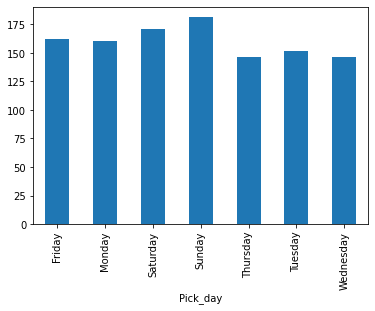

In [74]:
i_data.groupby('Pick_day')['Original_distance_Kms'].mean().plot(kind = 'bar')

In [75]:
dp = pd.DataFrame({'Monday': 160.530068, 'Tuesday': 151.609285, 'Wednesday': 146.812861, 
                   'Thursday': 146.621999, 'Friday': 162.142866,'Saturday': 170.699314, 'Sunday': 181.555291}, index= [0,1,2,3,4,5,6]).T
dp.reset_index(inplace = True)
dp.drop([1,2,3,4,5,6], axis= 1, inplace = True)

In [76]:
dp.columns =  ['Week_Day', 'Mean_Distance']

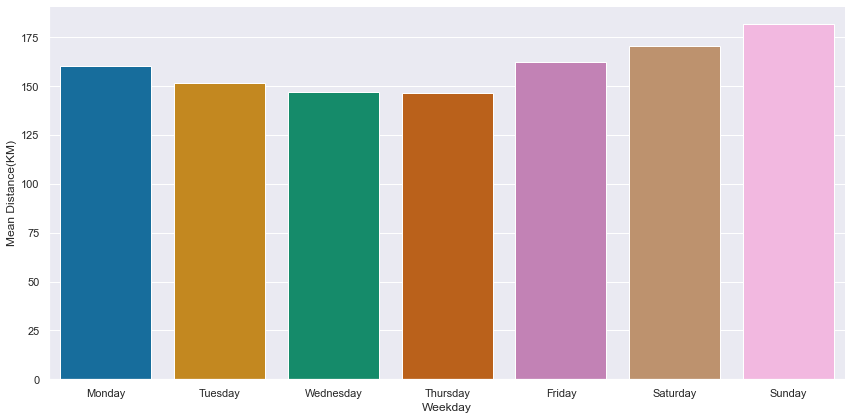

In [77]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.set(font_scale = 1)
g = sns.catplot(data= dp, x = "Week_Day", y="Mean_Distance", kind = 'bar', height = 6, aspect= 2, ci = None, palette= 'colorblind')
g.set_axis_labels("Weekday", "Mean Distance(KM)")


### __11.2 Analysis on the top and low pickup, drop location__

In [78]:
i_data.head()

,VendorID,Passenger_count,Total_amount,Time_diff_min,Pick_day,Dropping_day,Pick_locationId,Dropoff_locationId,Pick_location,Drop_location,Slat,Slong,Elat,Elong,Original_distance_Kms
600026,NaN,NaN,15.00,4.00,Monday,Monday,NY 193,NY 202,"(40.72716062203284, -73.7761231874068)","(40.78069902088275, -73.7913228558524)",40.727161,-73.776123,40.780699,-73.791323,6.082373
157547,2.0,1.0,15.30,7.17,Monday,Monday,NY 170,NY 234,"(40.74819996320862, -73.79810381718592)","(40.764273998917886, -73.74699005285179)",40.748200,-73.798104,40.764274,-73.746990,4.670808
478264,NaN,NaN,56.73,39.03,Monday,Monday,NY 163,NY 22,"(40.77774019939085, -73.80063988135805)","(41.327980000000025, -73.80560999999994)",40.777740,-73.800640,41.327980,-73.805610,61.108272
72045,2.0,2.0,62.30,16.73,Monday,Monday,NY 132,NY 145,"(40.78385336804671, -73.83643594182026)","(40.65864967061559, -73.72604400399864)",40.783853,-73.836436,40.658650,-73.726044,16.742245
327843,2.0,1.0,12.80,9.65,Monday,Monday,NY 164,NY 162,"(40.750415354616045, -73.80297832398533)","(40.760605703709125, -73.80395237371366)",40.750415,-73.802978,40.760606,-73.803952,1.134615


### __Pickup Locations__

In [79]:
i_data['Pick_locationId'].value_counts().nlargest(10)

NY 237    31094
NY 236    29488
NY 161    19969
NY 186    19635
NY 142    19134
NY 170    19069
NY 239    19014
NY 141    18854
NY 162    17708
NY 132    16718
Name: Pick_locationId, dtype: int64

### __11.2.1 Top pickup location__

Text(0.5, 1.0, 'Top Pickup Locations')

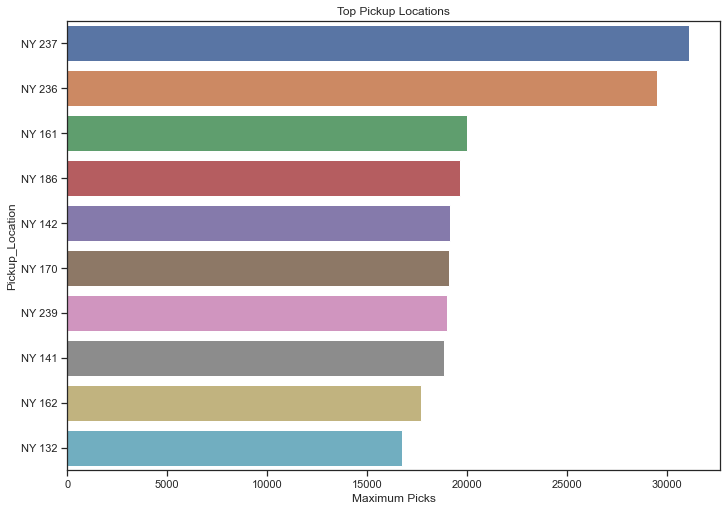

In [80]:
import matplotlib.pyplot as plt
sns.set_theme(style="ticks")
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.countplot(data=i_data, order=i_data.Pick_locationId.value_counts().nlargest(10).index, y='Pick_locationId')
ax.set(xlabel='Maximum Picks', ylabel='Pickup_Location')
ax.set_title('Top Pickup Locations')

### __11.2.2 Low pickup location__

Text(0.5, 1.0, 'Lowest Pickup Locations')

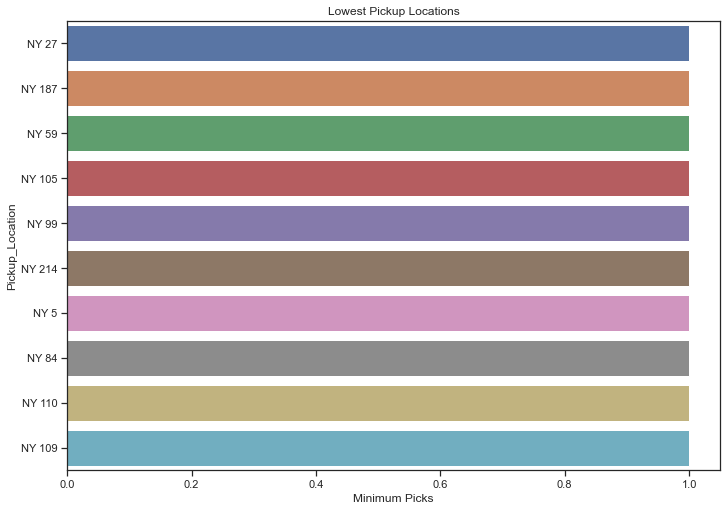

In [81]:
sns.set_theme(style="ticks")
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.countplot(data=i_data, order=i_data.Pick_locationId.value_counts().nsmallest(10).index, y='Pick_locationId')
ax.set(xlabel='Minimum Picks', ylabel='Pickup_Location')
ax.set_title('Lowest Pickup Locations')

## __Dropoff Locations__

In [82]:
i_data['Dropoff_locationId'].value_counts().nlargest(10)

NY 236    29056
NY 237    27122
NY 141    18276
NY 170    18062
NY 161    17830
NY 239    17490
NY 142    16314
NY 238    16167
NY 48     14435
NY 140    14390
Name: Dropoff_locationId, dtype: int64

### __11.2.3 Top dropoff location__

Text(0.5, 1.0, 'Top Dropoff Locations')

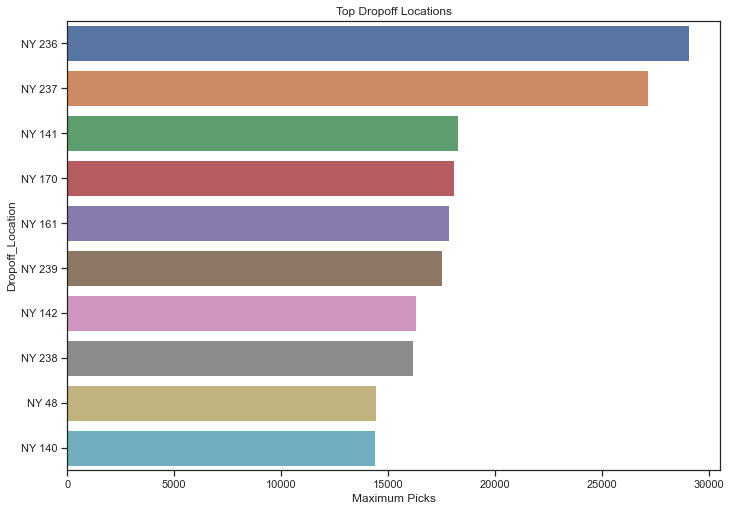

In [83]:
sns.set_theme(style="ticks")
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.countplot(data=i_data, order=i_data.Dropoff_locationId.value_counts().nlargest(10).index, y='Dropoff_locationId')
ax.set(xlabel='Maximum Picks', ylabel='Dropoff_Location')
ax.set_title('Top Dropoff Locations')

### __11.2.4 Low dropoff location__

Text(0.5, 1.0, 'Low Dropoff Locations')

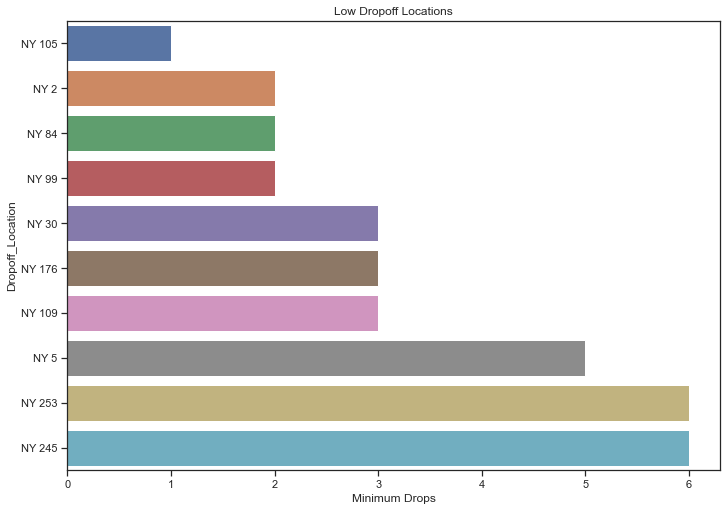

In [84]:
sns.set_theme(style="ticks")
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.countplot(data=i_data, order=i_data.Dropoff_locationId.value_counts().nsmallest(10).index, y='Dropoff_locationId')
ax.set(xlabel='Minimum Drops', ylabel='Dropoff_Location')
ax.set_title('Low Dropoff Locations')

## __11.3 Dropping NaN values__

In [85]:
i_data.shape

(600027, 15)

In [86]:
i_data.isnull().sum()

VendorID                 33494
Passenger_count          33494
Total_amount                 0
Time_diff_min                0
Pick_day                     0
Dropping_day                 0
Pick_locationId              0
Dropoff_locationId           0
Pick_location                0
Drop_location                0
Slat                         0
Slong                        0
Elat                         0
Elong                        0
Original_distance_Kms        0
dtype: int64

In [87]:
i_data.dropna(inplace= True)

In [88]:
i_data.reset_index(drop = True, inplace = True)
i_data.head(5)

,VendorID,Passenger_count,Total_amount,Time_diff_min,Pick_day,Dropping_day,Pick_locationId,Dropoff_locationId,Pick_location,Drop_location,Slat,Slong,Elat,Elong,Original_distance_Kms
0,2.0,1.0,15.30,7.17,Monday,Monday,NY 170,NY 234,"(40.74819996320862, -73.79810381718592)","(40.764273998917886, -73.74699005285179)",40.748200,-73.798104,40.764274,-73.746990,4.670808
1,2.0,2.0,62.30,16.73,Monday,Monday,NY 132,NY 145,"(40.78385336804671, -73.83643594182026)","(40.65864967061559, -73.72604400399864)",40.783853,-73.836436,40.658650,-73.726044,16.742245
2,2.0,1.0,12.80,9.65,Monday,Monday,NY 164,NY 162,"(40.750415354616045, -73.80297832398533)","(40.760605703709125, -73.80395237371366)",40.750415,-73.802978,40.760606,-73.803952,1.134615
3,2.0,1.0,13.56,8.63,Monday,Monday,NY 236,NY 140,"(40.65374004452198, -73.74707492242896)","(40.6708135271599, -73.77244755545968)",40.653740,-73.747075,40.670814,-73.772448,2.863257
4,2.0,1.0,5.30,3.00,Monday,Monday,NY 244,NY 116,"(40.7232747439702, -73.72368731719021)","(42.77506510217652, -73.67322955917082)",40.723275,-73.723687,42.775065,-73.673230,227.927761


## __12. Passenger count by pickup location__

In [89]:
i_data.groupby('Pick_day')['Passenger_count'].value_counts()

Pick_day   Passenger_count
Friday     1.0                67438
           2.0                13234
           3.0                 3475
           5.0                 2247
           0.0                 2051
           6.0                 1573
           4.0                 1307
Monday     1.0                54094
           2.0                10040
           3.0                 2605
           5.0                 1826
           0.0                 1682
           6.0                 1261
           4.0                  918
Saturday   1.0                57215
           2.0                14052
           3.0                 3755
           5.0                 2221
           0.0                 1806
           4.0                 1509
           6.0                 1286
Sunday     1.0                41740
           2.0                10055
           3.0                 2647
           5.0                 1565
           0.0                 1361
           6.0                 1092
 

### __12.1 Visualization of the passenger count on the weekdays__

[Text(0.5, 0, 'Count'), Text(0, 0.5, 'Week_day')]

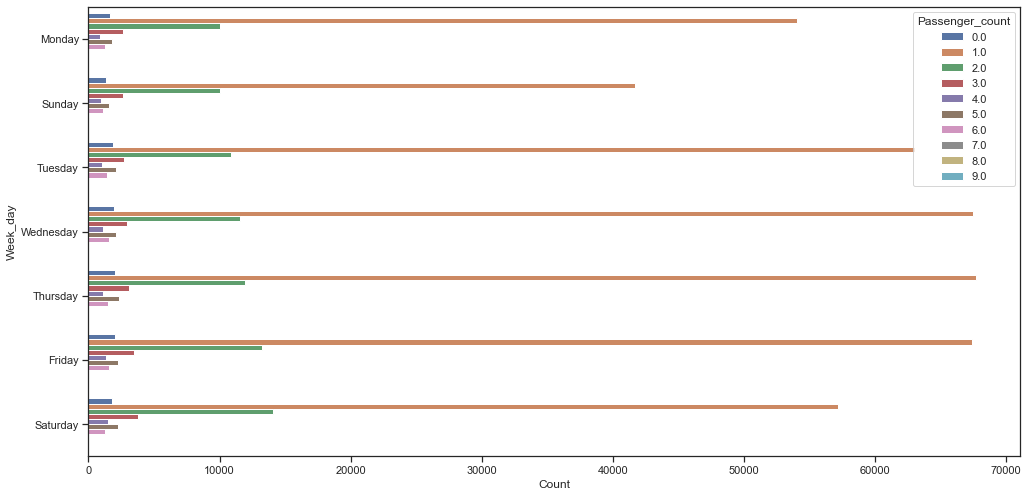

In [90]:
sns.set_theme(style="ticks")
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(16.7, 8.27)
ax = sns.countplot(y="Pick_day", hue="Passenger_count", data=i_data)
sns.color_palette('dark')
ax.set(xlabel='Count', ylabel='Week_day')

In [91]:
!pip install pydeck

### __12.2 Analyzing with count 1__

In [92]:
i_data['slat_long'] = i_data[['Slong', 'Slat']].apply(tuple, axis=1)
i_data['elat_long'] = i_data[['Elong', 'Elat']].apply(tuple, axis=1)

### __12.3 Visualizing data with passenger count = 1__

In [93]:
import pydeck as pdk

GREEN_RGB = [0, 255, 0, 40]
RED_RGB = [240, 100, 0, 40]

arc_layer = pdk.Layer(
    "ArcLayer",
    data=i_data[i_data['Passenger_count'] == 1.0].head(10),
    get_width="S000 * 2",
    get_source_position=["Slong", "Slat"],
    get_target_position=["Elong", "Elat"],
    get_tilt=15,
    get_source_color=RED_RGB,
    get_target_color=GREEN_RGB,
    pickable=True,
    auto_highlight=True,
)

view_state = pdk.ViewState(latitude=40.7128, longitude=-74.0060, bearing=45, pitch=50, zoom=8,)
#TOOLTIP_TEXT = {"html": "Trips <br /> Pickup location in red; Dropoff location in green"}
r = pdk.Deck(arc_layer, initial_view_state=view_state, tooltip={"text": "{Pick_locationId} to {Dropoff_locationId} and distance is {Original_distance_Kms}"})
r.to_html("arc_layer.html")


### __12.4 Visualiazing the top pickup and dropping locations__

In [94]:
!pip install folium pandas

In [95]:
i_data['Pick_locationId'].value_counts().nlargest(5)

NY 237    30476
NY 236    28788
NY 161    19570
NY 186    19387
NY 142    18693
Name: Pick_locationId, dtype: int64

### __Pickup locations__

In [96]:
d = { 'Pick_locat' : [[40.69285268505702, -73.72533553048825],[40.65374004452198, -73.74707492242896],[40.74698543007731, -73.79163530001794], [40.754544522261114, -73.80572351878894], [40.67003757418262, -73.77273106839746]],
        'locationid' : ['NY 237', 'NY236', 'NY 186', 'NY 161', 'NY 142']}
df1 = pd.DataFrame(d)
df1

,Pick_locat,locationid
0,"[40.69285268505702, -73.72533553048825]",NY 237
1,"[40.65374004452198, -73.74707492242896]",NY236
2,"[40.74698543007731, -73.79163530001794]",NY 186
3,"[40.754544522261114, -73.80572351878894]",NY 161
4,"[40.67003757418262, -73.77273106839746]",NY 142


In [97]:
# pickup location
# #40.7128° N, 74.0060° W - Newyork location
import folium
center = [40.7128, -74.0060]
map_Newyork = folium.Map(location=center, zoom_start=8)

for i,r in df1.iterrows():
    folium.Marker(location=r['Pick_locat'],
                  popup = r['locationid'],
                  tooltip='PickUP Location').add_to(map_Newyork)
#display map
map_Newyork

### __Dropping locations__

In [98]:
i_data['Dropoff_locationId'].value_counts().nlargest(5)

NY 236    28300
NY 237    26527
NY 141    17821
NY 170    17490
NY 161    17382
Name: Dropoff_locationId, dtype: int64

In [99]:
d2 = { 'Dropoff_locat' : [[40.76272801766687, -73.72059648349116],[40.69285268505702, -73.72533553048825],[40.67078003458249, -73.7630699406206], [40.68933569229372, -73.72398491932245], [40.754544522261114, -73.80572351878894]],
        'locationid' : ['NY 236', 'NY 237', 'NY 141', 'NY 239', 'NY 161']}
df2 = pd.DataFrame(d2)
df2

,Dropoff_locat,locationid
0,"[40.76272801766687, -73.72059648349116]",NY 236
1,"[40.69285268505702, -73.72533553048825]",NY 237
2,"[40.67078003458249, -73.7630699406206]",NY 141
3,"[40.68933569229372, -73.72398491932245]",NY 239
4,"[40.754544522261114, -73.80572351878894]",NY 161


In [100]:
#dropping locations
import folium
center = [40.7128, -74.0060]
map_Newyork = folium.Map(location=center, zoom_start=8)

for i,r in df2.iterrows():
    folium.Marker(location=r['Dropoff_locat'],
                  popup = r['locationid'],
                  tooltip='Dropoff Location').add_to(map_Newyork)
#display map
map_Newyork

In [101]:
i_data.shape

(566533, 17)

In [105]:
i1 = idata.iloc[:, [2,3,4,5,9,10,12,13,20]]
i1.dropna(inplace = True)
i1.reset_index(drop = True, inplace = True)

D:\Anaconda\envs\my_env\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Text(0.5, 1.0, 'Time Vs Passenger counts')

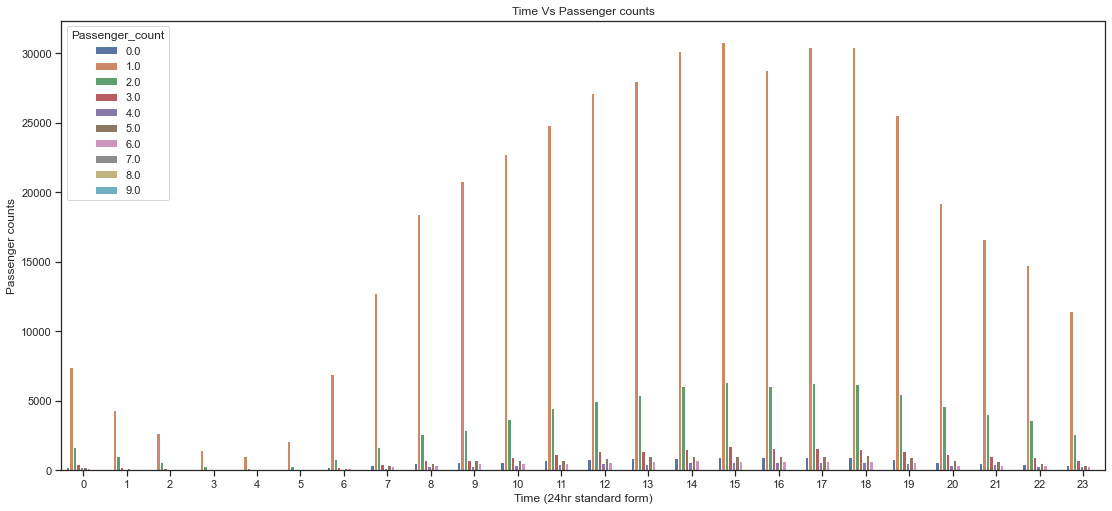

In [106]:
sns.set_theme(style="ticks")
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.7, 8.27)
ax = sns.countplot(data=i1, hue="Passenger_count", x= i1['Pickup_datetime'].dt.hour)
ax.set(xlabel='Time (24hr standard form)', ylabel='Passenger counts')
ax.set_title('Time Vs Passenger counts')

### __12.5 Analysis on the NY 236__

Text(0.5, 1.0, 'WeekDay Vs Passenger counts')

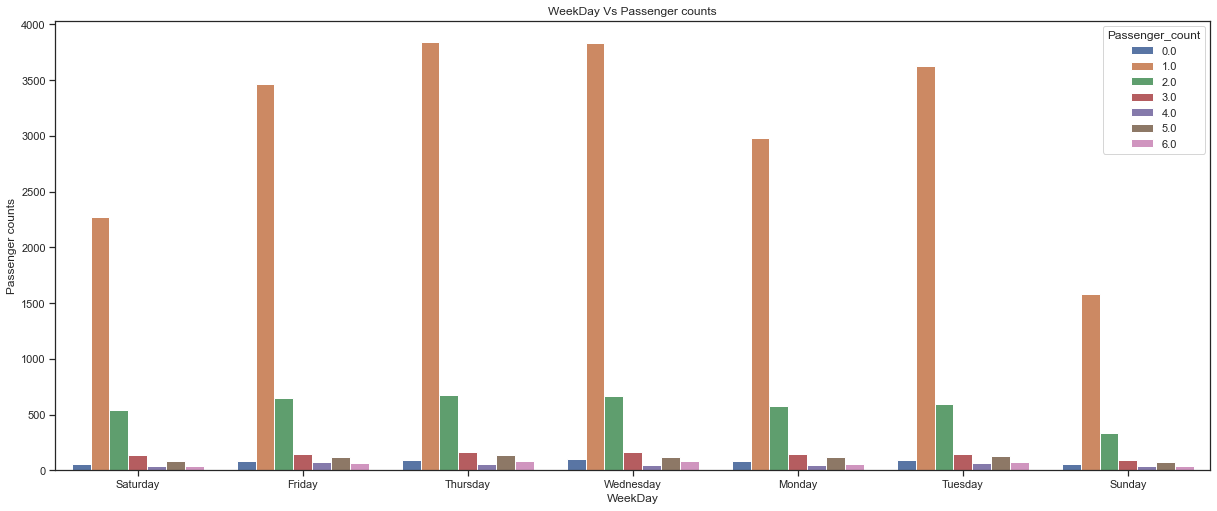

In [107]:
ny_p = i1[i1['Pick_locationId'] == 'NY 236']
sns.set_theme(style="ticks")
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(20.7, 8.27)
ax = sns.countplot(data= ny_p, hue="Passenger_count", x= 'Pick_day')
ax.set(xlabel='WeekDay', ylabel='Passenger counts')
ax.set_title('WeekDay Vs Passenger counts')

Text(0.5, 1.0, 'Time Vs Passenger counts')

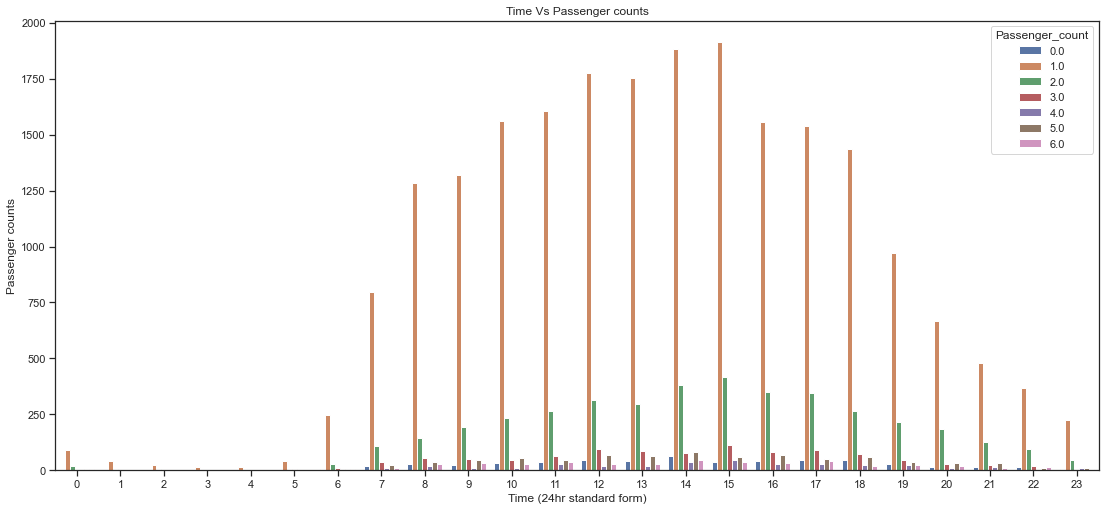

In [108]:
sns.set_theme(style="ticks")
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.7, 8.27)
ax = sns.countplot(data= ny_p, hue="Passenger_count", x= ny_p['Pickup_datetime'].dt.hour)
ax.set(xlabel='Time (24hr standard form)', ylabel='Passenger counts')
ax.set_title('Time Vs Passenger counts')

# __Conclusion__

### __In this dataset, the latitude, longitude, new travel distance, and time difference are calculated. Few outliners are also identified in the data due to improper entry.__

### __From the calculations and analysis following are key findings:__

- ### Friday is the most active day and where most people utilized the taxis.
- ### Raids with a single passenger are booked more compared to the 2,3,4 passengers
- ### NY 237 is the most common pickup point. Because it has an intersection with famous locations and schools.
- ### NY 236 is the most common dropoff point. 
- ### Where NY 140 has low pickup points and NY 99 has low dropping points compared to all others.
- ### Wednesday and thursday are the most busiest days at NY 236 location
- ### From morning 6 am to 14 pm is linear increment and from 15 pm to night 23 pm there is linear decrement
- ### From Night 1 am to 5 am usage of taxis are very low.
